# Inferential statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('darkgrid')

### Exercise: Hypothesis testing

Dữ liệu: Tập dữ liệu bao gồm các điểm của học sinh trong các môn học khác nhau.

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


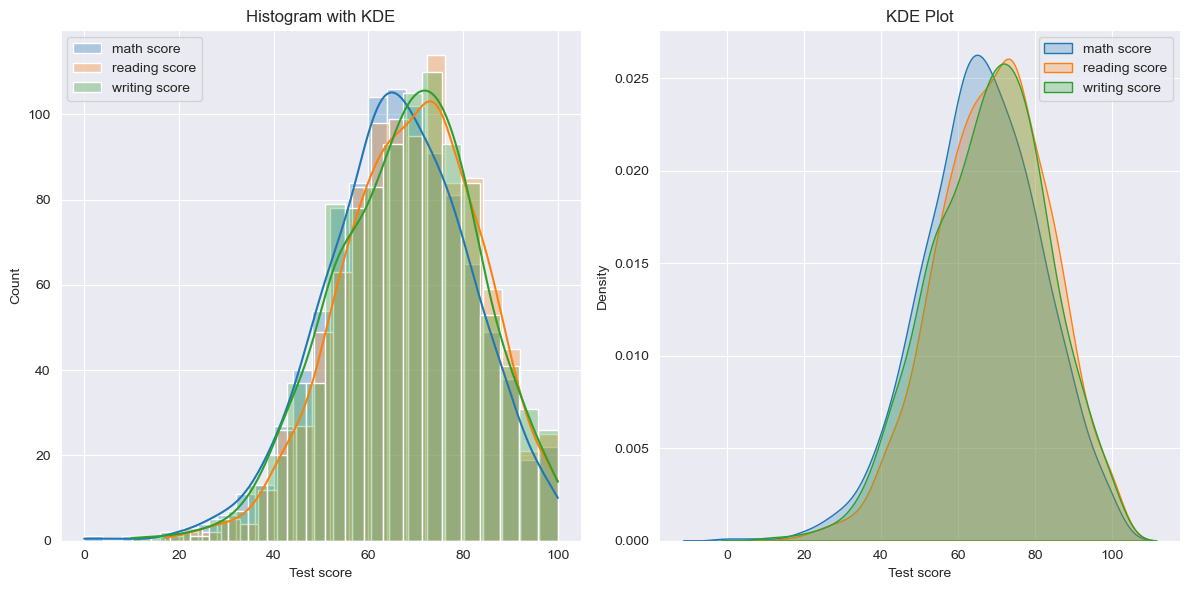

In [4]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Iterate over the attributes and plot histograms and KDE plots
for attribute in ['math score', 'reading score', 'writing score']:
    # Plot histogram with KDE on the left subplot
    sns.histplot(df[attribute], kde=True, label=attribute, ax=axes[0], alpha=0.3)
    axes[0].set_xlabel('Test score')
    axes[0].set_ylabel('Count')
    axes[0].legend()
    axes[0].set_title('Histogram with KDE')

    # Plot KDE plot on the right subplot
    sns.kdeplot(df[attribute], label=attribute, ax=axes[1], fill=True)
    axes[1].set_xlabel('Test score')
    axes[1].set_ylabel('Density')
    axes[1].legend()
    axes[1].set_title('KDE Plot')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### HomeWork
Kiểm định giả thuyết không có sự khác nhau về điểm trung bình giữa học sinh tham gia và không tham gia bài kiểm tra trước khoá học. Lựa chọn alpha = 0.05.
- Hãy thực hiện theo ít nhất 1 trong những cách sau: sử dụng công thức (nếu được, tham khảo https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_unequal_variances_(sX1_%3E_2sX2_or_sX2_%3E_2sX1) và sử dụng thư viện.
- Vẽ phân bố xác suất tương ứng và vị trí của các điểm statistic và critical.

Your code goes here

### Welch’s t-test is a two-sample test that does not assume equal variances of the two populations. The equations for Welch’s t-test are:
- **t-statistic**: 
$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$
where $\bar{X}_1$ and $\bar{X}_2$ are the sample means, $s_1^2$ and $s_2^2$ are the sample variances, and $n_1$ and $n_2$ are the sample sizes of the two groups.

- **Pooled variance**: 
$$s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$$
where $s_p^2$ is an unbiased estimator of the common variance of the two populations.

- **Degrees of freedom**: 
$$\nu = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{(s_1^2 / n_1)^2}{n_1 - 1} + \frac{(s_2^2 / n_2)^2}{n_2 - 1}}$$
where $\nu$ is an approximation of the degrees of freedom using the Welch–Satterthwaite equation.


In [5]:
def perform_t_test_and_plot(data_group1, data_group2, alpha=0.05, use_library=True):
    # Calculate t-statistic, p-value, and degrees of freedom
    # Perform t-test and plot
    from scipy.stats import t
    if use_library:
        # Use weightstats.ttest_ind from statsmodels.stats to calculate t-statistic, p-value, and degrees of freedom
        from statsmodels.stats import weightstats
        t_statistic, p_value, degrees_of_freedom = weightstats.ttest_ind(data_group1, data_group2, usevar='unequal', alternative='two-sided')
    else:
        # Use Welch's t-test formula to calculate t-statistic, p-value, and degrees of freedom
        n1, n2 = len(data_group1), len(data_group2)
        mean1, mean2 = np.mean(data_group1), np.mean(data_group2)
        var1, var2 = np.var(data_group1, ddof=1), np.var(data_group2, ddof=1)
        dof_numerator = ((var1 / n1 + var2 / n2)**2)
        dof_denominator = ((var1 / n1)**2 / (n1 - 1)) + ((var2 / n2)**2 / (n2 - 1))
        degrees_of_freedom = dof_numerator / dof_denominator
        t_statistic = (mean1 - mean2) / np.sqrt(var1 / n1 + var2 / n2)
        # Calculate the p-value
        p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=degrees_of_freedom))

    # Print results
    print(f"t-statistic: {t_statistic}\np-value: {p_value}")
    print(f"alpha = {alpha}")
    if p_value < alpha:
        print("There is evidence to reject the null hypothesis")
    else:
        print("There is no evidence to reject the null hypothesis")
    
    # Plot the t-distribution and rejection region
    plt.figure(figsize=(12, 6))
    x = np.linspace(t.ppf(0.0000001, degrees_of_freedom), t.ppf(0.9999999, degrees_of_freedom), 1000)
    y = t.pdf(x, degrees_of_freedom)
    plt.plot(x, y, color='blue', label='t-distribution')
    t_crit = t.ppf(1 - alpha / 2, degrees_of_freedom)
    plt.vlines(x=0, ymin=0, ymax=max(y), color='black', linestyle='--', label='null hypothesis')
    plt.vlines(x=[-t_statistic,t_statistic], ymin=0, ymax=max(y), color='red', linestyle='--', label='t-statistic')
    plt.vlines(x=[-t_crit,t_crit], ymin=0, ymax=max(y), color='green', linestyle=':', label='critical value at alpha = 0.05')
    plt.fill_between(x, y, where=(x >= t_crit) | (x <= -t_crit), color='orange', alpha=0.5, label='rejection region')
    plt.xlabel('t value')
    plt.ylabel('probability density')
    plt.title('t-distribution and rejection region for two-sample t-test')
    plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)
    plt.show()

## Null Hypothesis: There is no difference in the average scores of students who participated and did not participate in test preparation course.

In [6]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [7]:
# Create a new column 'average score'
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['average score'].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: average score, dtype: float64

#### Use Welch's t-test formula to calculate t-statistic, p-value, degrees of freedom, and plot t-distribution for the column 'average score'

t-statistic: 8.594538326688614
p-value: 0.0
alpha = 0.05
There is evidence to reject the null hypothesis


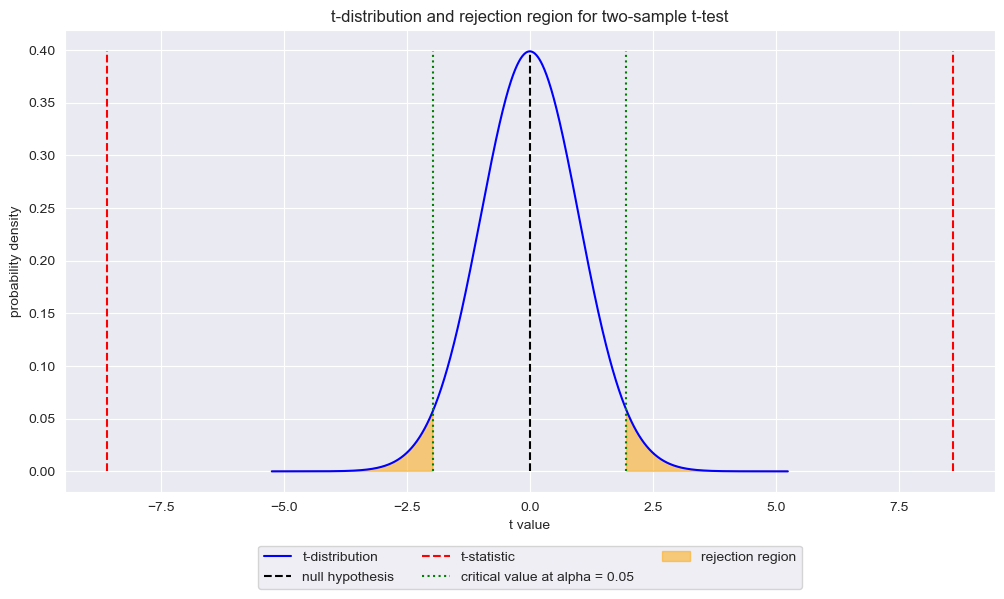

In [8]:
# Perform independent two-sample t-test
group1_data = df[df['test preparation course'] == 'completed']['average score']
group2_data = df[df['test preparation course'] == 'none']['average score']
perform_t_test_and_plot(group1_data, group2_data, use_library=False)

#### Use weightstats.ttest_ind from statsmodels.stats to calculate t-statistic, p-value, degrees of freedom, and plot t-distribution for the column 'average score'

t-statistic: 8.594538326688614
p-value: 4.4267252713187285e-17
alpha = 0.05
There is evidence to reject the null hypothesis


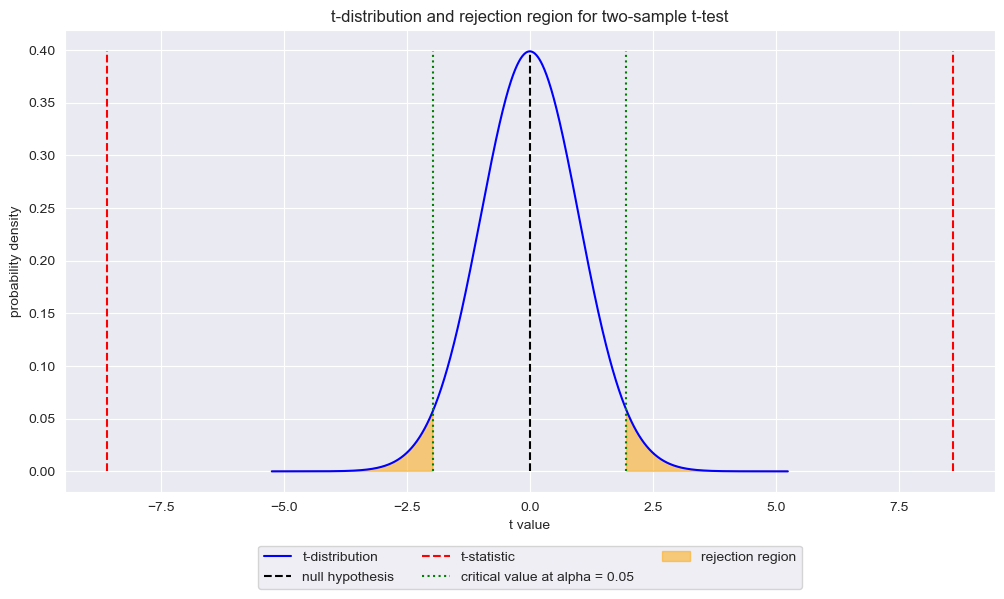

In [9]:
perform_t_test_and_plot(group1_data, group2_data, use_library=True)

## Null Hypothesis: There is no difference in the scores of students who participated and did not participate in test preparation course.

### Two ways to calculate t-statistic, p-value, degrees of freedom, and plot t-distribution for columns 'math score', 'reading score', 'writing score'
### 1. Use Welch's t-test formula
### 2. Use weightstats.ttest_ind from statsmodels.stats

1. Performing t-test and plot for math score using the Welch's t-test formula:
t-statistic: 5.786983157907754
p-value: 1.0425616592257825e-08
alpha = 0.05
There is evidence to reject the null hypothesis


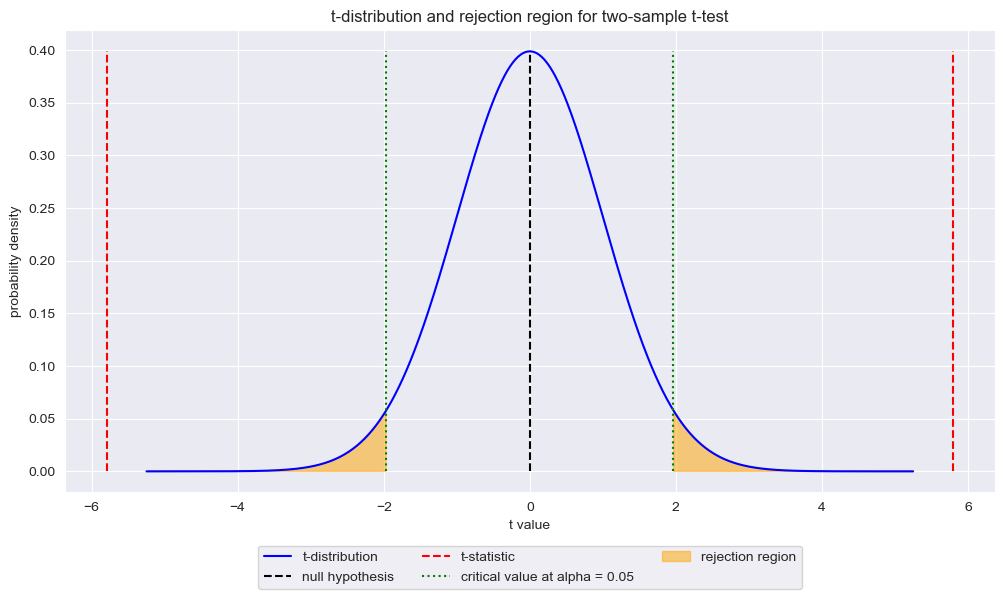

2. Performing t-test and plot for math score scores using the weightstats.ttest_ind from statsmodels.stats:
t-statistic: 5.786983157907755
p-value: 1.0425616722069513e-08
alpha = 0.05
There is evidence to reject the null hypothesis


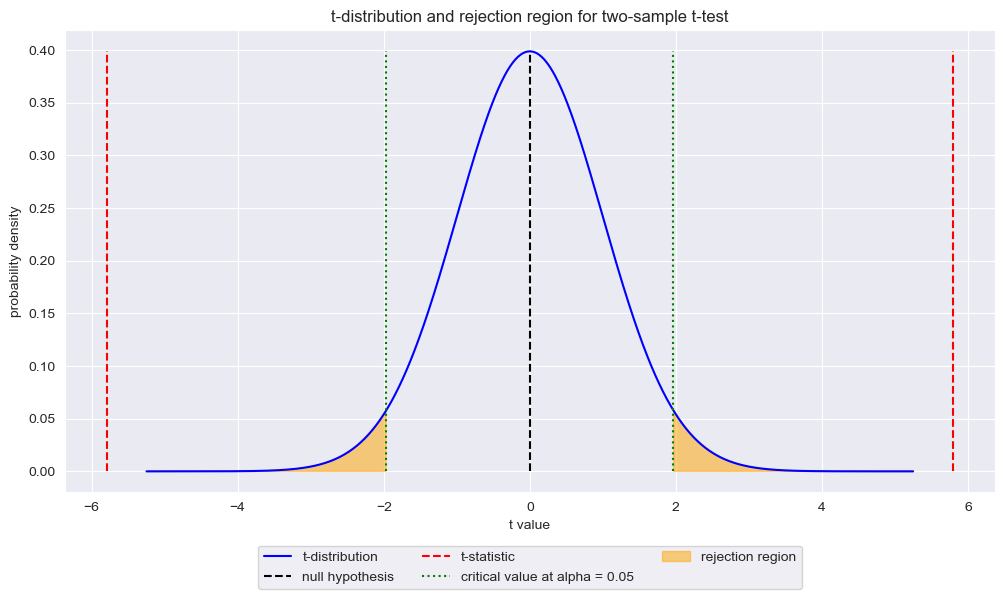

1. Performing t-test and plot for reading score using the Welch's t-test formula:
t-statistic: 8.004132353965
p-value: 4.440892098500626e-15
alpha = 0.05
There is evidence to reject the null hypothesis


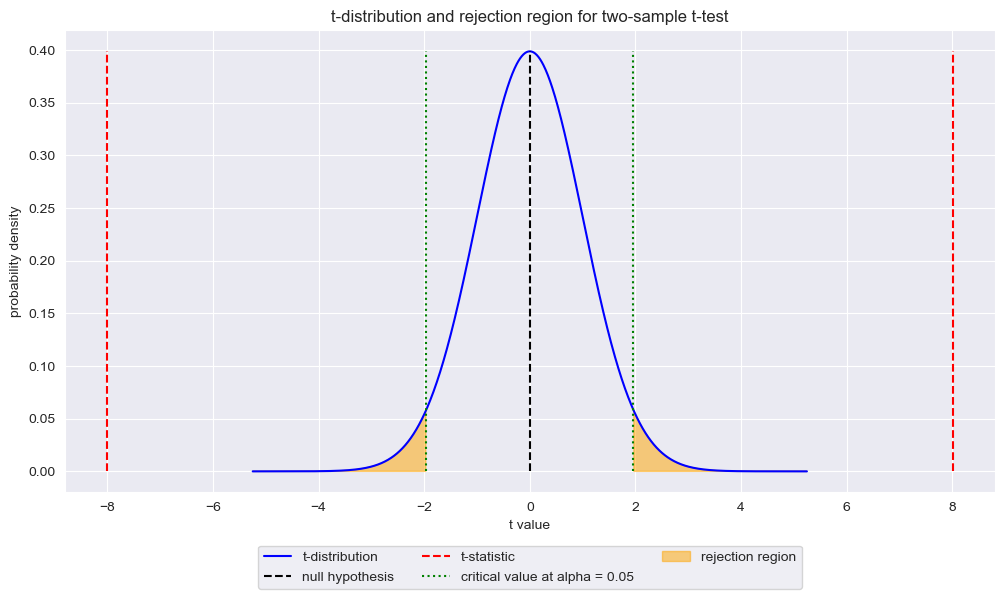

2. Performing t-test and plot for reading score scores using the weightstats.ttest_ind from statsmodels.stats:
t-statistic: 8.004132353965
p-value: 4.388808024290596e-15
alpha = 0.05
There is evidence to reject the null hypothesis


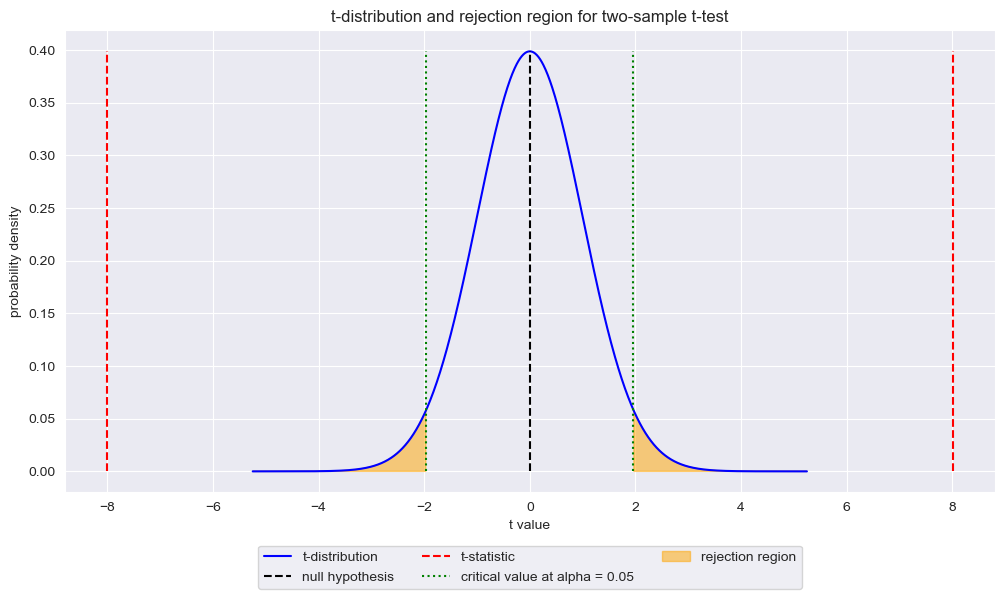

1. Performing t-test and plot for writing score using the Welch's t-test formula:
t-statistic: 10.75251023388693
p-value: 0.0
alpha = 0.05
There is evidence to reject the null hypothesis


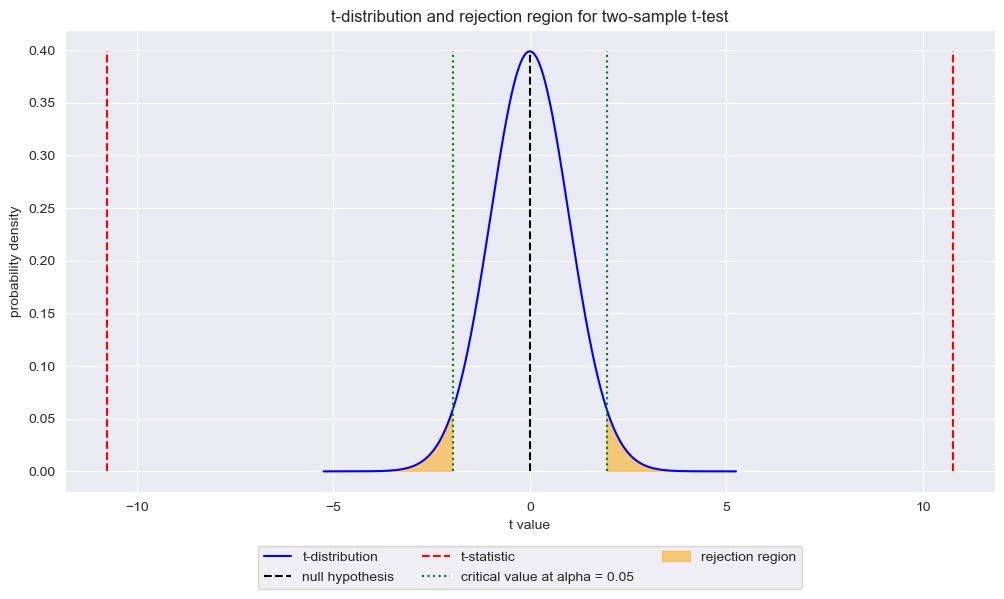

2. Performing t-test and plot for writing score scores using the weightstats.ttest_ind from statsmodels.stats:
t-statistic: 10.752510233886923
p-value: 2.662740173941028e-25
alpha = 0.05
There is evidence to reject the null hypothesis


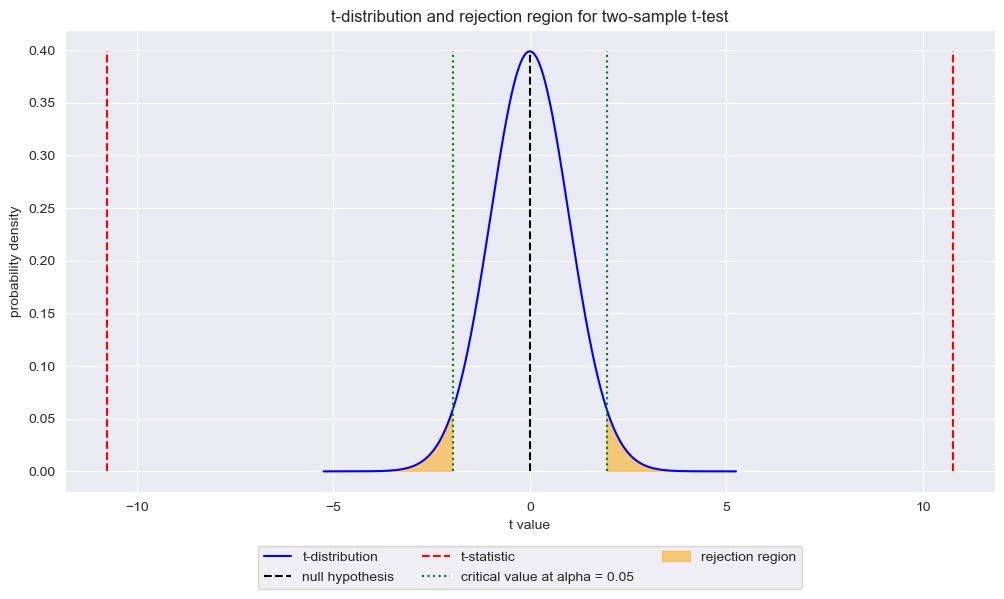

In [10]:
# Iterate over columns and perform t-test and plot for each column using the Welch's t-test formula and Use weightstats.ttest_ind from statsmodels.stats
for col in ['math score', 'reading score', 'writing score']:
    data_completed = df[df['test preparation course'] == 'completed'][col]
    data_none = df[df['test preparation course'] == 'none'][col]
    
    print(f"1. Performing t-test and plot for {col} using the Welch's t-test formula:")
    perform_t_test_and_plot(data_completed, data_none, use_library=False)

    print(f"2. Performing t-test and plot for {col} scores using the weightstats.ttest_ind from statsmodels.stats:")
    perform_t_test_and_plot(data_completed, data_none, use_library=True)